# Descripción del proyecto

Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing.

# Paso 1. Acceda los datos y prepáralos para el análisis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando los datos
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

# Revisa las primeras filas de los datos para entender su estructura:
display("Visitas:")
display(visits.head())
display("\nPedidos:")
display(orders.head())
display("\nCostos:")
display(costs.head())

'Visitas:'

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


'\nPedidos:'

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


'\nCostos:'

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [11]:
# Renombrar la columna en visits
visits = visits.rename(columns={'Source Id': 'source_id'})

# Convertir todos los nombres de las columnas a minúsculas
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

# Mostrar los nombres de las columnas actualizados
display("Columnas de visits:\n", visits.columns)
display("Columnas de orders:\n", orders.columns)
display("Columnas de costs:\n", costs.columns)


'Columnas de visits:\n'

Index(['device', 'end ts', 'source_id', 'start ts', 'uid'], dtype='object')

'Columnas de orders:\n'

Index(['buy ts', 'revenue', 'uid'], dtype='object')

'Columnas de costs:\n'

Index(['source_id', 'dt', 'costs'], dtype='object')

In [12]:
# inspeccionar los tipos de datos en cada dataset.
display(visits.info())
display()
display(orders.info())
display()
display(costs.info())
display()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

In [13]:
# Verificar valores nulos
display("Valores nulos en visitas:", visits.isnull().sum())
display("Valores nulos en pedidos:", orders.isnull().sum())
display("Valores nulos en costos:", costs.isnull().sum())

# Verificar duplicados
display("Duplicados en visitas:", visits.duplicated().sum())
display("Duplicados en pedidos:", orders.duplicated().sum())
display("Duplicados en costos:", costs.duplicated().sum())

'Valores nulos en visitas:'

device       0
end ts       0
source_id    0
start ts     0
uid          0
dtype: int64

'Valores nulos en pedidos:'

buy ts     0
revenue    0
uid        0
dtype: int64

'Valores nulos en costos:'

source_id    0
dt           0
costs        0
dtype: int64

'Duplicados en visitas:'

np.int64(0)

'Duplicados en pedidos:'

np.int64(0)

'Duplicados en costos:'

np.int64(0)

In [14]:
# Convierte columnas al tipo datetime
visits['start ts'] = pd.to_datetime(visits['start ts'], format= '%Y-%m-%d %H:%M:%S')
visits['end ts'] = pd.to_datetime(visits['end ts'], format='%Y-%m-%d %H:%M:%S')
orders['buy ts'] = pd.to_datetime(orders['buy ts'], format='%Y-%m-%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

# Confirmar los cambios
display(visits.info())
display()
display(orders.info())
display()
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

Dado los resultados **no tenemos faltantes ni duplicados** que se checarian con:
costs.isnull().sum()
visits.duplicated().sum()

# Paso 2. Haz informes y calcula métricas

# Visitas

In [15]:
# Creamos columnas adicionales
visits['session_year'] = visits['start ts'].dt.isocalendar().year
visits['session_month'] = visits['start ts'].dt.month
visits['session_week'] = visits['start ts'].dt.isocalendar().week
visits['session_date'] = visits['start ts'].dt.date

Usuarios únicos diarios (DAU) - Promedio: 907.99
Primeros 5 DAU:
 session_date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: uid, dtype: int64


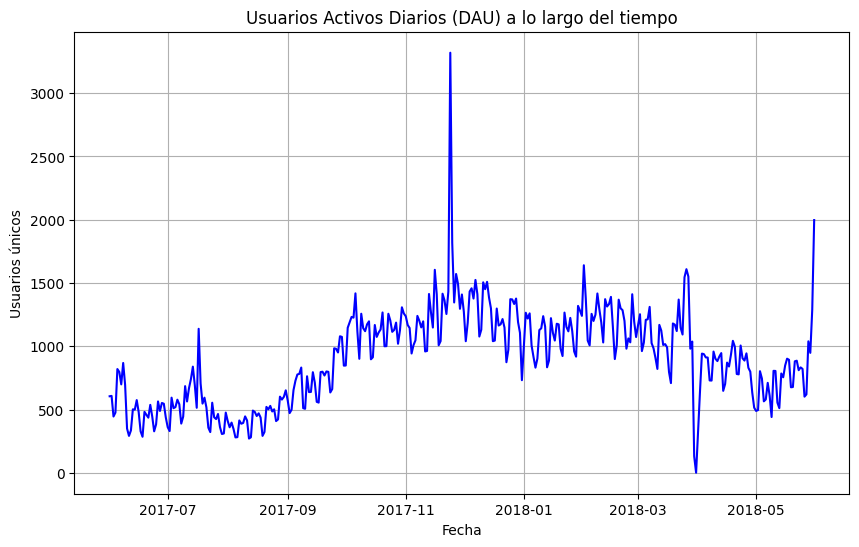

In [16]:
# ¿Cuántas personas lo usan cada día, semana y mes?

# DAU: Daily Active Users
dau = visits.groupby('session_date')['uid'].nunique()
print("Usuarios únicos diarios (DAU) - Promedio:", dau.mean().round(2))
print("Primeros 5 DAU:\n", dau.head())

# Gráfico para DAU (Daily Active Users)
plt.figure(figsize=(10, 6))
dau.plot(kind='line', color='blue')
plt.title("Usuarios Activos Diarios (DAU) a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Usuarios únicos")
plt.grid()
plt.show()

Podemos observar como incrementan los usuarios cada día durante el 2017 


Usuarios únicos semanales (WAU) - Promedio: 5716.25
Primeros 5 WAU:
 session_year  session_week
2017          22              2021
              23              4129
              24              2812
              25              2878
              26              3064
Name: uid, dtype: int64


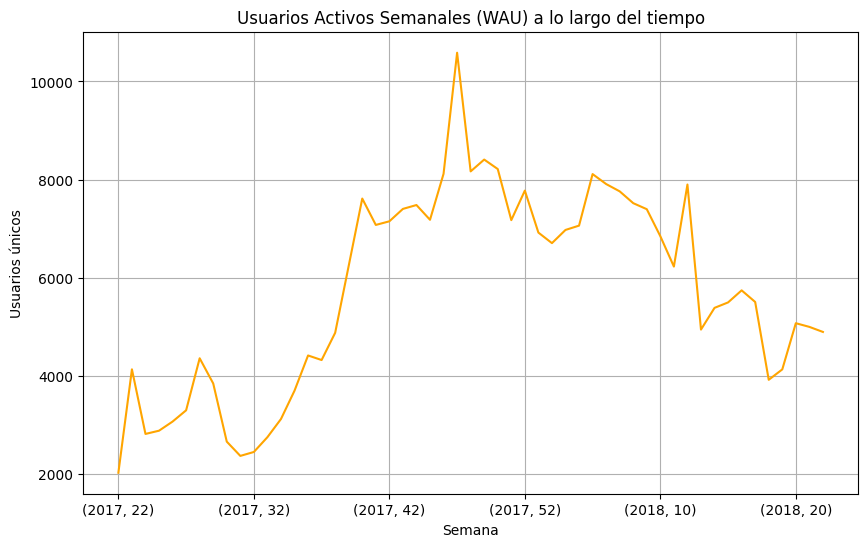

In [17]:
# WAU: Weekly Active Users
wau = visits.groupby(['session_year', 'session_week'])['uid'].nunique()
print("\nUsuarios únicos semanales (WAU) - Promedio:", wau.mean().round(2))
print("Primeros 5 WAU:\n", wau.head())

# Gráfico para WAU (Weekly Active Users)
plt.figure(figsize=(10, 6))
wau.plot(kind='line', color='orange')
plt.title("Usuarios Activos Semanales (WAU) a lo largo del tiempo")
plt.xlabel("Semana")
plt.ylabel("Usuarios únicos")
plt.grid()
plt.show()

Los usuarios semanales de igual manera van incrementando mostrando fluctuaciones. 


Usuarios únicos mensuales (MAU) - Promedio: 23228.42
Primeros 5 MAU:
 session_year  session_month
2017          6                13259
              7                14183
              8                11631
              9                18975
              10               29692
Name: uid, dtype: int64


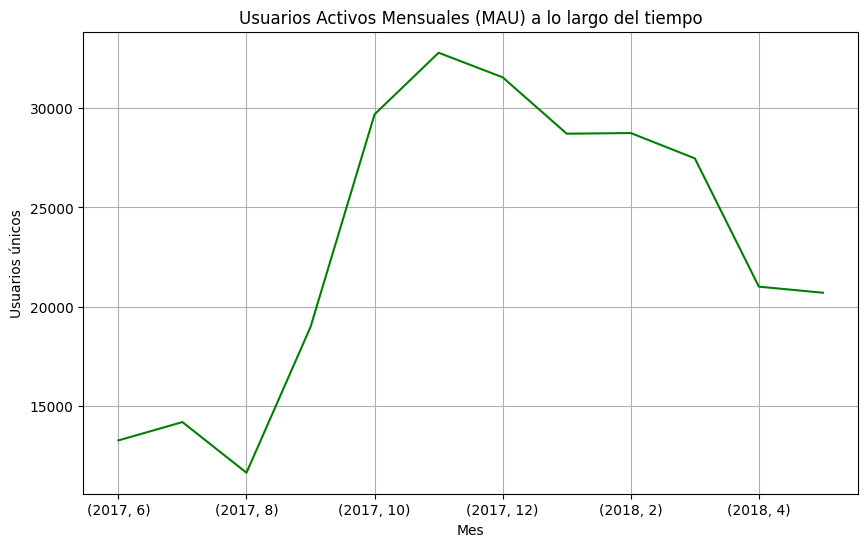

In [18]:
# MAU: Monthly Active Users
mau = visits.groupby(['session_year', 'session_month'])['uid'].nunique()
print("\nUsuarios únicos mensuales (MAU) - Promedio:", mau.mean().round(2))
print("Primeros 5 MAU:\n", mau.head())

# Gráfico para MAU (Monthly Active Users)
plt.figure(figsize=(10, 6))
mau.plot(kind='line', color='green')
plt.title("Usuarios Activos Mensuales (MAU) a lo largo del tiempo")
plt.xlabel("Mes")
plt.ylabel("Usuarios únicos")
plt.grid()
plt.show()

Los usuarios mensuales experimentan ciclos de crecimiento y contracción.

In [19]:
# ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)

sessions_per_day = visits.groupby('session_date')['uid'].count()
print("\nSesiones por día (promedio):", sessions_per_day.mean().round(2))
print("Primeras 5 sesiones por día:\n", sessions_per_day.head())


Sesiones por día (promedio): 987.36
Primeras 5 sesiones por día:
 session_date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: uid, dtype: int64


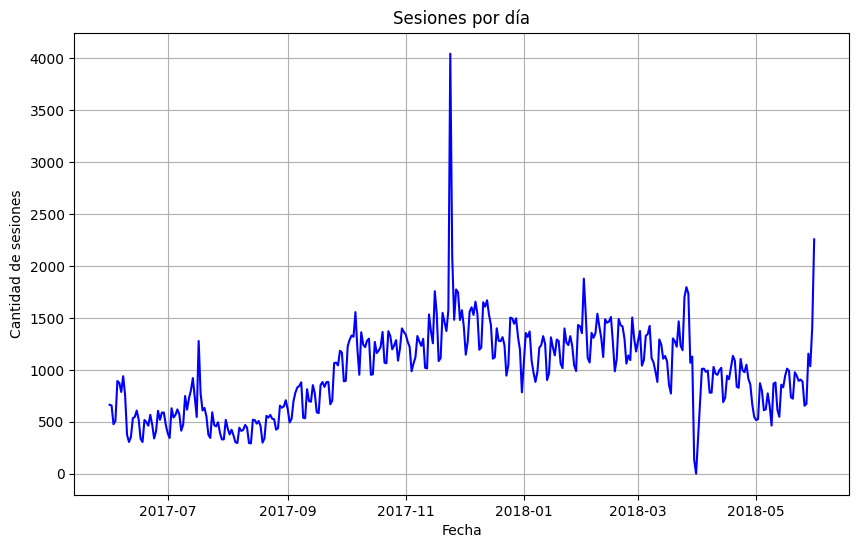

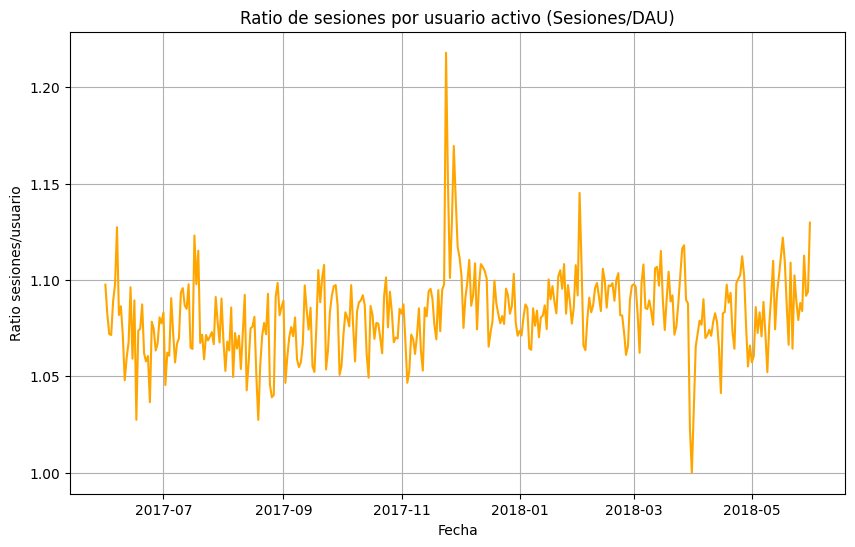

In [20]:
# Gráfico de sesiones por día
plt.figure(figsize=(10, 6))
sessions_per_day.plot(kind='line', color='blue')
plt.title("Sesiones por día")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de sesiones")
plt.grid()
plt.show()

# Gráfico de sesiones por usuario (ratio)
sessions_ratio = sessions_per_day / dau  # Calculamos el ratio sesiones/usuario
plt.figure(figsize=(10, 6))
sessions_ratio.plot(kind='line', color='orange')
plt.title("Ratio de sesiones por usuario activo (Sesiones/DAU)")
plt.xlabel("Fecha")
plt.ylabel("Ratio sesiones/usuario")
plt.grid()
plt.show()

Las sesiones por día sirven para analizar la actividad general. 

El ratio de sesiones por usuario activo nos ayuda a evaluar la intensidad del uso o la retención de los usuarios.

In [21]:
# ¿Cuál es la duración de cada sesión?

visits['session_duration'] = (visits['end ts'] - visits['start ts']).dt.total_seconds() / 60
valid_sessions = visits[visits['session_duration'] > 0]

print("\nDuración promedio de sesiones válidas (minutos):", valid_sessions['session_duration'].mean().round(2))
print("Primeras 5 duraciones:\n", visits[['uid', 'session_duration']].head())


Duración promedio de sesiones válidas (minutos): 11.9
Primeras 5 duraciones:
                     uid  session_duration
0  16879256277535980062              18.0
1    104060357244891740              28.0
2   7459035603376831527               0.0
3  16174680259334210214              24.0
4   9969694820036681168               0.0


In [22]:
# Calcular estadísticas complementarias
mean_duration = valid_sessions['session_duration'].mean().round(2)
median_duration = valid_sessions['session_duration'].median().round(2)
percentiles = valid_sessions['session_duration'].quantile([0.25, 0.5, 0.75]).round(2)  # Percentiles 25, 50 (mediana) y 75

# Mostrar resultados
display("Duración promedio (media):", mean_duration)
display("Mediana de la duración:", median_duration)
display("Percentiles (25%, 50%, 75%):")
display(percentiles)


'Duración promedio (media):'

np.float64(11.9)

'Mediana de la duración:'

np.float64(6.0)

'Percentiles (25%, 50%, 75%):'

0.25     2.0
0.50     6.0
0.75    15.0
Name: session_duration, dtype: float64

Duración promedio (media): 11.9
Mediana de la duración: 6.0
Percentiles (25%, 50%, 75%):
0.25     2.0
0.50     6.0
0.75    15.0
Name: session_duration, dtype: float64


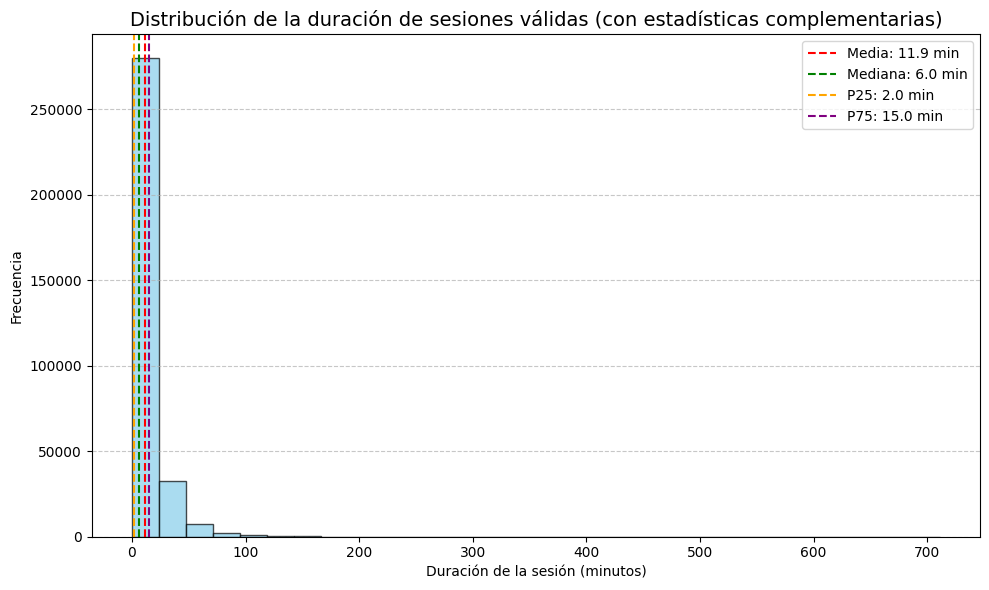

In [23]:
# Calcular estadísticas complementarias
mean_duration = valid_sessions['session_duration'].mean().round(2)
median_duration = valid_sessions['session_duration'].median().round(2)
percentiles = valid_sessions['session_duration'].quantile([0.25, 0.5, 0.75]).round(2)  # Percentiles 25, 50 (mediana) y 75

# Mostrar resultados
print("Duración promedio (media):", mean_duration)
print("Mediana de la duración:", median_duration)
print("Percentiles (25%, 50%, 75%):")
print(percentiles)

# Agregar las estadísticas clave al gráfico de histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(valid_sessions['session_duration'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_duration, color='red', linestyle='--', label=f"Media: {mean_duration} min")
plt.axvline(median_duration, color='green', linestyle='--', label=f"Mediana: {median_duration} min")
plt.axvline(percentiles[0.25], color='orange', linestyle='--', label=f"P25: {percentiles[0.25]} min")
plt.axvline(percentiles[0.75], color='purple', linestyle='--', label=f"P75: {percentiles[0.75]} min")

# Personalizar el gráfico
plt.title("Distribución de la duración de sesiones válidas (con estadísticas complementarias)", fontsize=14)
plt.xlabel("Duración de la sesión (minutos)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
# ¿Con qué frecuencia los usuarios regresan?

user_return_frequency = visits.groupby('uid')['session_date'].nunique()
returning_users = user_return_frequency[user_return_frequency > 1].count()
total_users = user_return_frequency.count()
retention_rate = (returning_users / total_users) * 100

display("\nFrecuencia promedio de días visitados por usuario:", user_return_frequency.mean().round(2))
display(f"Porcentaje de usuarios que regresan: {retention_rate:.2f}%")
display("Primeras 5 frecuencias:\n", user_return_frequency.head())

'\nFrecuencia promedio de días visitados por usuario:'

np.float64(1.45)

'Porcentaje de usuarios que regresan: 19.74%'

'Primeras 5 frecuencias:\n'

uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    3
325320750514679    2
Name: session_date, dtype: int64

In [25]:
# Calcular Sticky Factor basado en tus cálculos de DAU y MAU
sticky_factor = (dau.mean() / mau.mean())

print(f"Sticky Factor promedio basado en DAU y MAU: {(sticky_factor * 100):.2f}%")


Sticky Factor promedio basado en DAU y MAU: 3.91%


El sticky factor (factor de adherencia). Esta métrica te dice qué tan leal es la audiencia (con qué frecuencia regresan a la aplicación)

# Ventas

In [26]:
# Obtener la primera visita de cada usuario
first_visits = visits.groupby('uid')['start ts'].min().reset_index()
first_visits.rename(columns={'start ts': 'first_visit_date'}, inplace=True)

# Obtener la primera compra de cada usuario
first_purchases = orders.groupby('uid')['buy ts'].min().reset_index()
first_purchases.rename(columns={'buy ts': 'first_purchase_date'}, inplace=True)

# Unir ambas tablas en base a 'uid'
conversion_data = pd.merge(first_visits, first_purchases, on='uid', how='inner')

# Calcular días desde la primera visita hasta la primera compra
conversion_data['days_to_conversion'] = (
    conversion_data['first_purchase_date'] - conversion_data['first_visit_date']
).dt.days

# Revisar los resultados
print(conversion_data[['uid', 'first_visit_date', 'first_purchase_date', 'days_to_conversion']].head())

                uid    first_visit_date first_purchase_date  \
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00   
2  2429014661409475 2017-10-11 17:14:00 2017-10-11 18:33:00   
3  2464366381792757 2018-01-27 20:10:00 2018-01-28 15:54:00   
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00   

   days_to_conversion  
0                 106  
1                   0  
2                   0  
3                   0  
4                   0  


In [27]:
# Calcular la media, mediana y percentiles
mean_conversion = conversion_data['days_to_conversion'].mean().round(2)
median_conversion = conversion_data['days_to_conversion'].median().round(2)
percentiles_conversion = conversion_data['days_to_conversion'].quantile([0.25, 0.5, 0.75]).round(2)

# Mostrar resultados
print("Media de días hasta la conversión:", mean_conversion)
print("Mediana de días hasta la conversión:", median_conversion)
print("Percentiles (25%, 50%, 75%):")
print(percentiles_conversion)

Media de días hasta la conversión: 16.73
Mediana de días hasta la conversión: 0.0
Percentiles (25%, 50%, 75%):
0.25    0.0
0.50    0.0
0.75    2.0
Name: days_to_conversion, dtype: float64


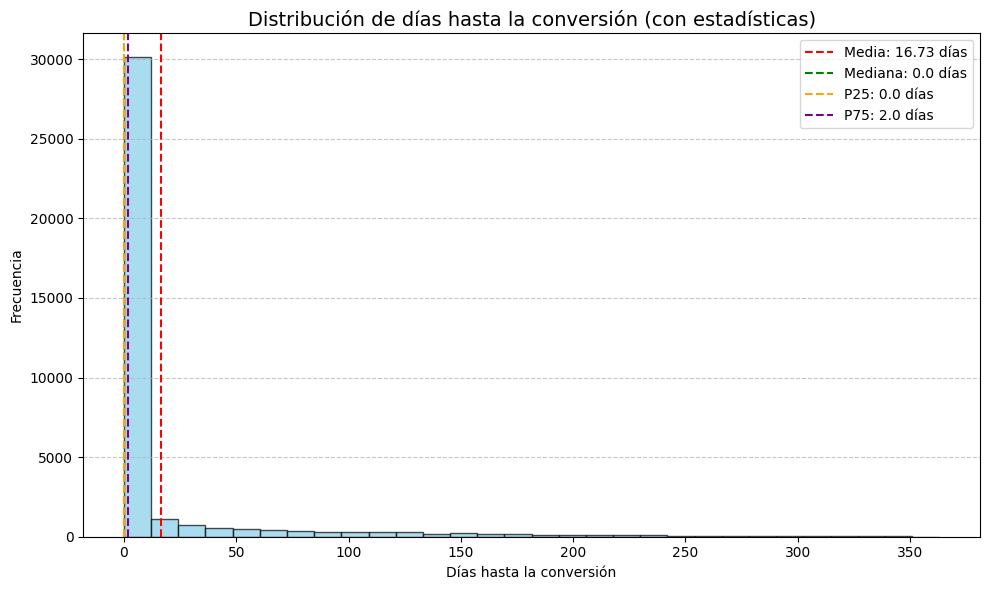

In [28]:
import matplotlib.pyplot as plt

# Histograma con estadísticas adicionales
plt.figure(figsize=(10, 6))
plt.hist(conversion_data['days_to_conversion'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_conversion, color='red', linestyle='--', label=f"Media: {mean_conversion} días")
plt.axvline(median_conversion, color='green', linestyle='--', label=f"Mediana: {median_conversion} días")
plt.axvline(percentiles_conversion[0.25], color='orange', linestyle='--', label=f"P25: {percentiles_conversion[0.25]} días")
plt.axvline(percentiles_conversion[0.75], color='purple', linestyle='--', label=f"P75: {percentiles_conversion[0.75]} días")

# Personalización del gráfico
plt.title("Distribución de días hasta la conversión (con estadísticas)", fontsize=14)
plt.xlabel("Días hasta la conversión")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
# ¿Cuántos pedidos hacen durante un período de tiempo dado?

# Número de pedidos por mes
orders['order_month'] = orders['buy ts'].dt.to_period('M')
monthly_orders = orders.groupby('order_month')['uid'].count()

print("Pedidos por mes:\n", monthly_orders.head())

Pedidos por mes:
 order_month
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
Freq: M, Name: uid, dtype: int64


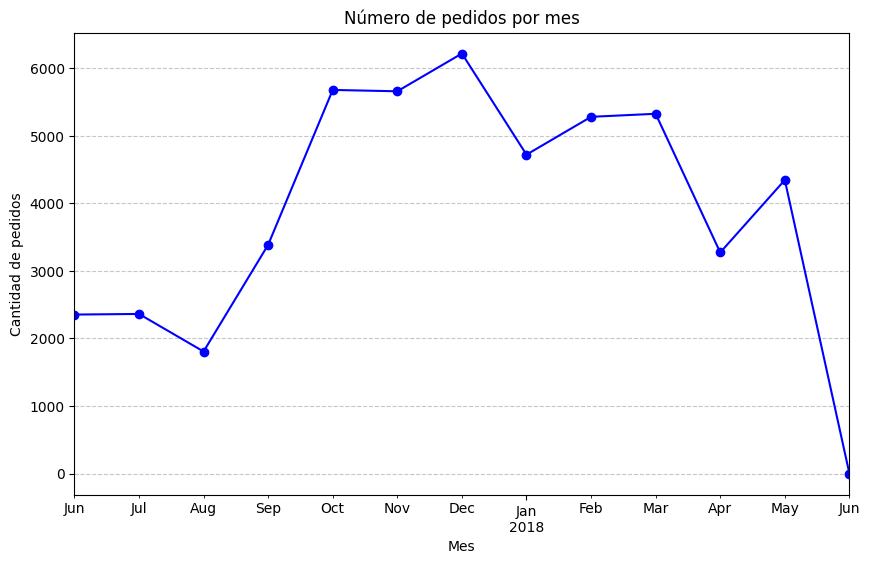

In [30]:
# Gráfico de pedidos por mes
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', color='blue', marker='o')
plt.title("Número de pedidos por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de pedidos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Tamaño promedio de compra por mes:
buy ts
2017-06    4.06
2017-07    5.31
2017-08    4.85
2017-09    5.42
2017-10    4.93
Freq: M, Name: revenue, dtype: float64


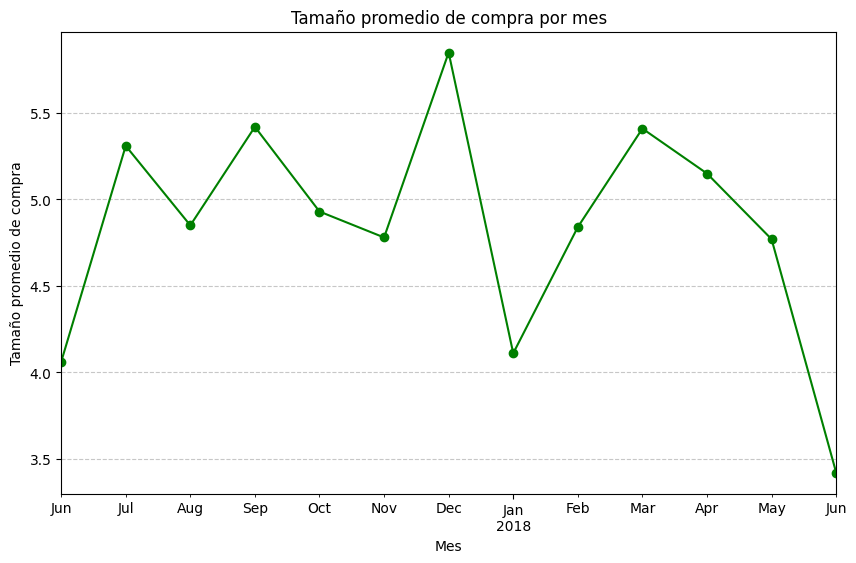

In [31]:
# Tamaño promedio de compra por mes
average_order_value_by_month = orders.groupby(orders['buy ts'].dt.to_period('M'))['revenue'].mean().round(2)
print("\nTamaño promedio de compra por mes:")
print(average_order_value_by_month.head())

# Gráfico del tamaño promedio por mes
plt.figure(figsize=(10, 6))
average_order_value_by_month.plot(kind='line', color='green', marker='o')
plt.title("Tamaño promedio de compra por mes")
plt.xlabel("Mes")
plt.ylabel("Tamaño promedio de compra")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Tamaño promedio de compra por dispositivo:
device
desktop     9.04
touch      10.58
Name: revenue, dtype: float64


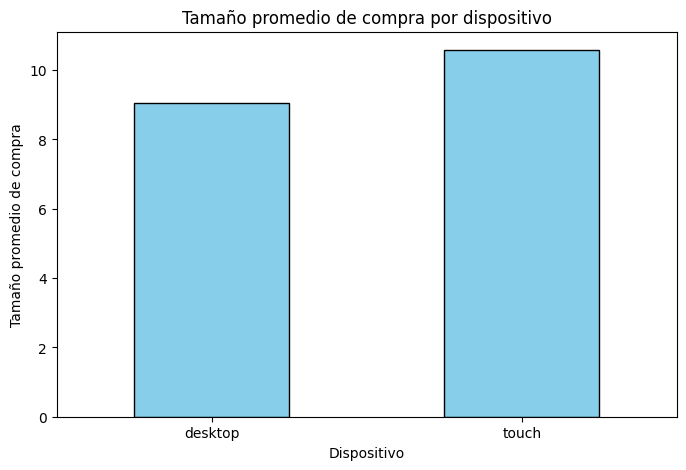

In [32]:
# Tamaño promedio de compra por dispositivo
merged_data = pd.merge(orders, visits[['uid', 'device']], on='uid', how='left')
average_order_value_by_device = merged_data.groupby('device')['revenue'].mean().round(2)
print("\nTamaño promedio de compra por dispositivo:")
print(average_order_value_by_device)

# Gráfico del tamaño promedio por dispositivo
plt.figure(figsize=(8, 5))
average_order_value_by_device.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Tamaño promedio de compra por dispositivo")
plt.xlabel("Dispositivo")
plt.ylabel("Tamaño promedio de compra")
plt.xticks(rotation=0)
plt.show()

Aquí nos muestra que el device touch tiene el mayor tamaño promedio de compra 

In [33]:
# **1. Obtener la primera visita de cada usuario y su fuente de adquisición**
first_visits = visits.groupby('uid').agg(
    first_visit_date=('start ts', 'min'),
    source_id=('source_id', 'first')  # Tomamos la fuente de la primera visita
).reset_index()

# **2. Unir la fuente de la primera visita con la tabla de órdenes**
merged_data = pd.merge(orders, first_visits[['uid', 'source_id']], on='uid', how='left')

# Revisar el resultado
display(merged_data.head())

,buy ts,revenue,uid,order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,3


Las fuentes de adquisición (representadas por source_id) son canales o plataformas a través de 
los cuales los usuarios fueron adquiridos: 

usuarios adquiridos por (redes sociales) podrían tener comportamientos diferentes a los adquiridos 
por (búsquedas pagadas). Ejemplos:

Source 1: Publicidad en redes sociales (e.g., Facebook Ads, Instagram Ads).

Source 2: Motores de búsqueda pagados (e.g., Google Ads).

Source 3: Tráfico orgánico (búsquedas en motores sin costo).

Source 4: Campañas de correo electrónico (email marketing).

Source 5: Publicidad en otros sitios (display ads).

Source 9: Programas de afiliados.

Source 10: Referencias directas (usuarios recomendados por otros clientes).


Tamaño promedio de compra por fuente de adquisición:
source_id
1     5.77
2     8.42
3     4.05
4     4.29
5     4.33
7     1.22
9     3.45
10    2.83
Name: revenue, dtype: float64


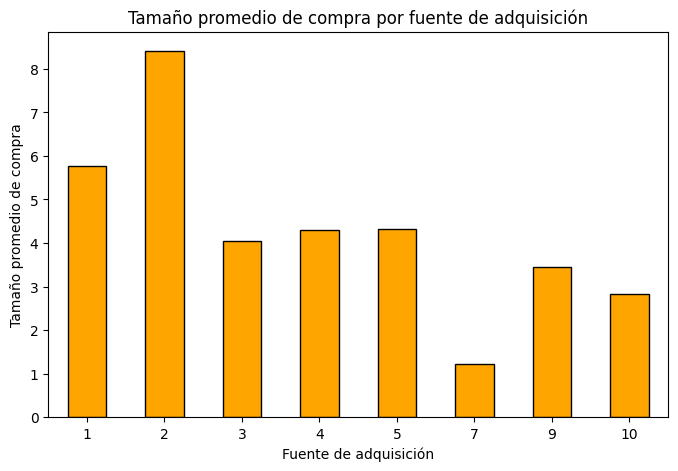

In [34]:
# Tamaño promedio de compra por fuente de adquisición
average_order_value_by_source = merged_data.groupby('source_id')['revenue'].mean().round(2)
print("\nTamaño promedio de compra por fuente de adquisición:")
print(average_order_value_by_source)

# Gráfico del tamaño promedio por fuente
plt.figure(figsize=(8, 5))
average_order_value_by_source.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Tamaño promedio de compra por fuente de adquisición")
plt.xlabel("Fuente de adquisición")
plt.ylabel("Tamaño promedio de compra")
plt.xticks(rotation=0)
plt.show()

In [35]:
# ¿Cuánto dinero traen? (LTV - Lifetime Value)

# **1. Calcular la primera compra para cada usuario**
first_purchases = orders.groupby('uid')['buy ts'].min().reset_index()
first_purchases.rename(columns={'buy ts': 'first_purchase_date'}, inplace=True)

# Crear columna del mes de la primera compra
first_purchases['first_purchase_month'] = first_purchases['first_purchase_date'].dt.to_period('M')

# **2. Unir esta información a la tabla de órdenes**
orders = pd.merge(orders, first_purchases[['uid', 'first_purchase_month']], on='uid', how='left')

# Crear columna del mes de la orden
orders['order_month'] = orders['buy ts'].dt.to_period('M')

# Crear columna de "edad de la cohorte" (diferencia en meses)
orders['cohort_age'] = (orders['order_month'] - orders['first_purchase_month']).apply(lambda x: x.n)

# **3. Contar cuántos usuarios hay en cada cohorte**
cohort_sizes = first_purchases.groupby('first_purchase_month')['uid'].nunique().reset_index()
cohort_sizes.rename(columns={'uid': 'cohort_users'}, inplace=True)

# **4. Crear tabla de LTV**
ltv_data = orders.groupby(['first_purchase_month', 'cohort_age'])['revenue'].sum().reset_index()

# Hacer left join con los tamaños de cohorte
ltv_data = pd.merge(ltv_data, cohort_sizes, on='first_purchase_month', how='left')

# Calcular el LTV dividiendo el revenue entre los usuarios de la cohorte
ltv_data['ltv'] = ltv_data['revenue'] / ltv_data['cohort_users']

# **5. Transformar en tabla pivote y acumular**
ltv_table_pivot = ltv_data.pivot_table(
    index='first_purchase_month',
    columns='cohort_age',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)  # Acumula el LTV a lo largo de los meses

# **6. Visualizar resultados**
display("Tabla LTV (acumulativa):")
display(ltv_table_pivot)

'Tabla LTV (acumulativa):'

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


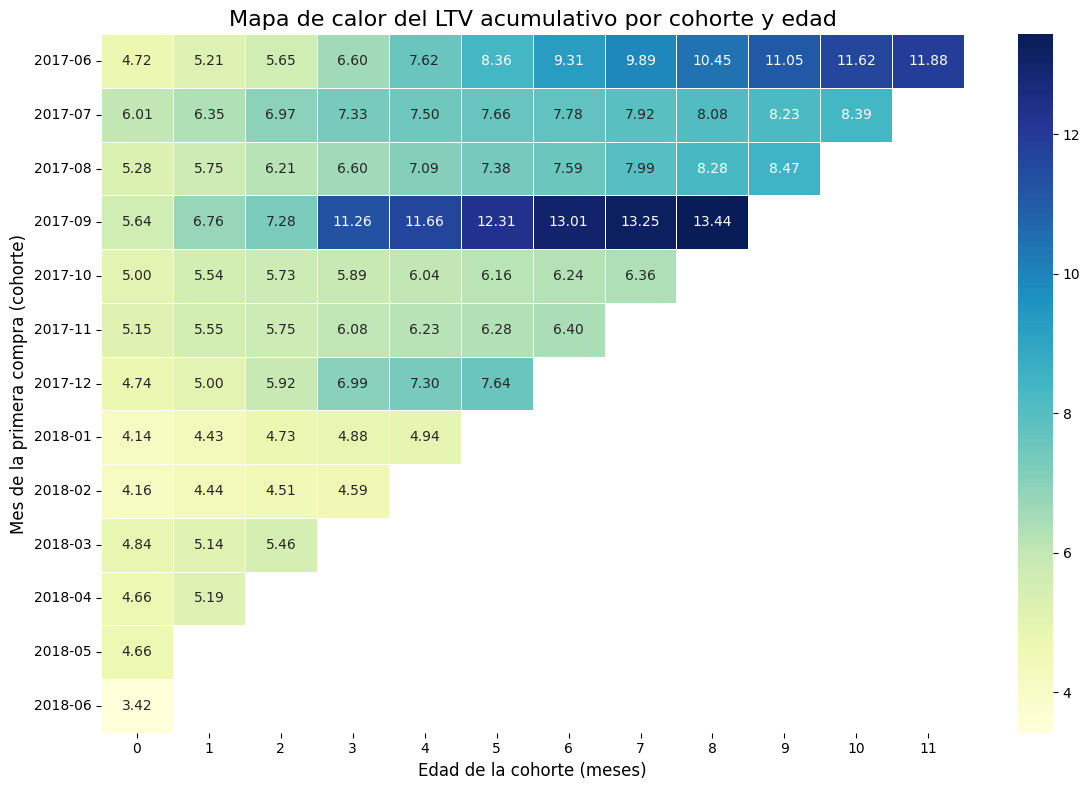

In [36]:
# Configurar estilo del mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(
    ltv_table_pivot, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    linewidths=0.5, 
    linecolor="white"
)

# Títulos y etiquetas
plt.title("Mapa de calor del LTV acumulativo por cohorte y edad", fontsize=16)
plt.xlabel("Edad de la cohorte (meses)", fontsize=12)
plt.ylabel("Mes de la primera compra (cohorte)", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Marketing

'Gasto total:\n'

np.float64(329131.62)

'Gastos por fuente:\n'

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

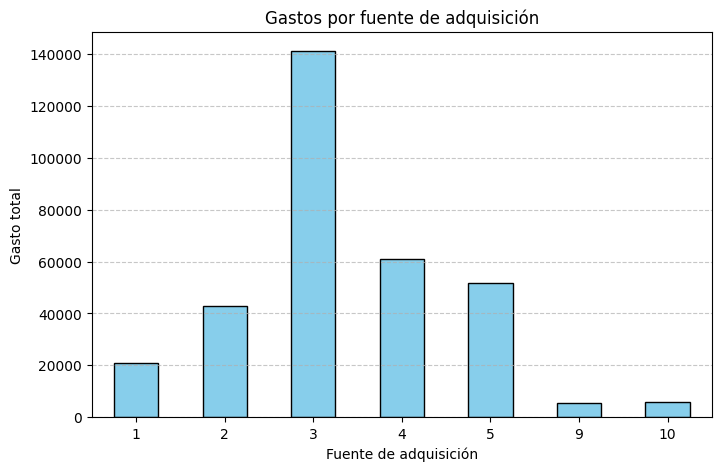

In [37]:
# ¿Cuánto dinero se gastó? Total por fuente de adquisición a lo largo del tiempo

# Total de gastos
total_costs = costs['costs'].sum().round(2)

# Gastos por fuente de adquisición
costs_per_source = costs.groupby('source_id')['costs'].sum().round(2)

display("Gasto total:\n", total_costs)
display("Gastos por fuente:\n", costs_per_source)


# Gráfico de barras: Gastos por fuente de adquisición
plt.figure(figsize=(8, 5))
costs_per_source.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Gastos por fuente de adquisición")
plt.xlabel("Fuente de adquisición")
plt.ylabel("Gasto total")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Gastos a lo largo del tiempo:
 month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64


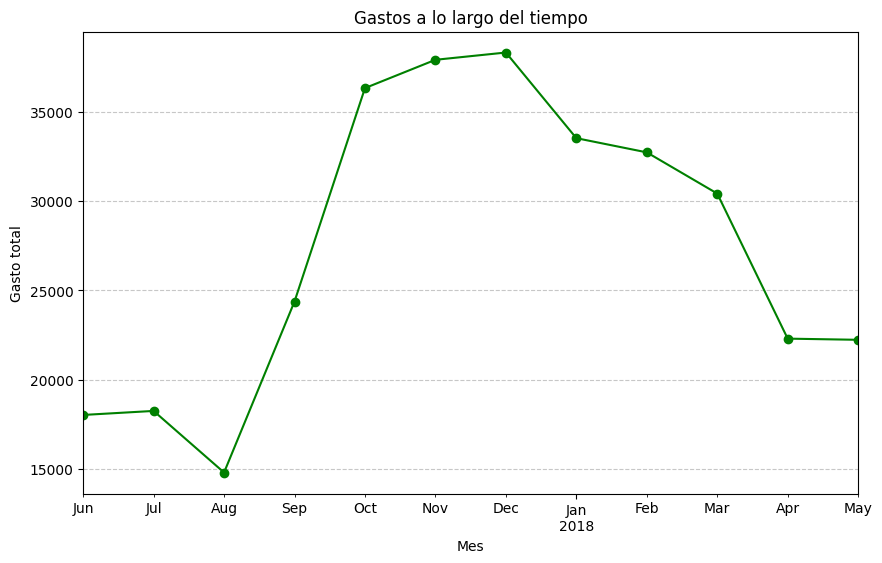

In [38]:
# Gastos a lo largo del tiempo
costs['month'] = costs['dt'].dt.to_period('M')
costs_over_time = costs.groupby('month')['costs'].sum().round(2)

print("Gastos a lo largo del tiempo:\n", costs_over_time)

# Gráfico de línea: Gastos a lo largo del tiempo
plt.figure(figsize=(10, 6))
costs_over_time.plot(kind='line', color='green', marker='o')
plt.title("Gastos a lo largo del tiempo")
plt.xlabel("Mes")
plt.ylabel("Gasto total")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
# **Calcular Costo de adquisición por cliente (CAC) diario promedio por fuente**

# Ordenar por uid y start ts, luego obtener la primera fuente de adquisición por usuario
first_visits = visits.sort_values(by=['uid', 'start ts']).groupby('uid', as_index=False).first()

# Renombrar la columna para mayor claridad
first_visits.rename(columns={'start ts': 'first_visit_date'}, inplace=True)

# Obtener la primera compra de cada usuario
first_purchases = orders.groupby('uid')['buy ts'].min().reset_index()
first_purchases.rename(columns={'buy ts': 'first_purchase_date'}, inplace=True)

# Unir las primeras visitas con las primeras compras por usuario
user_acquisition_data = pd.merge(first_visits, first_purchases, on='uid', how='inner')

# Agrupar por fuente y fecha para contar compradores
user_acquisition_data['purchase_date'] = user_acquisition_data['first_purchase_date'].dt.date
daily_buyers = user_acquisition_data.groupby(['source_id', 'purchase_date'])['uid'].nunique().reset_index()
daily_buyers.rename(columns={'uid': 'daily_buyers'}, inplace=True)

# Unir los gastos de marketing por fecha y fuente
costs['date'] = costs['dt'].dt.date
daily_costs = costs.groupby(['source_id', 'date'])['costs'].sum().reset_index()

daily_cac_data = pd.merge(daily_buyers, daily_costs, left_on=['source_id', 'purchase_date'], right_on=['source_id', 'date'], how='inner')

# Calcular el CAC diario
daily_cac_data['daily_cac'] = (daily_cac_data['costs'] / daily_cac_data['daily_buyers']).round(2)

# Agrupar por fuente para obtener el promedio del CAC diario
average_cac_per_source = daily_cac_data.groupby('source_id')['daily_cac'].mean().round(2)

# Resultados
display("Costo de adquisición por cliente (CAC) diario promedio por fuente:")
display(average_cac_per_source)

'Costo de adquisición por cliente (CAC) diario promedio por fuente:'

source_id
1      9.49
2     16.29
3     15.58
4      7.27
5      8.34
9      6.84
10     6.56
Name: daily_cac, dtype: float64

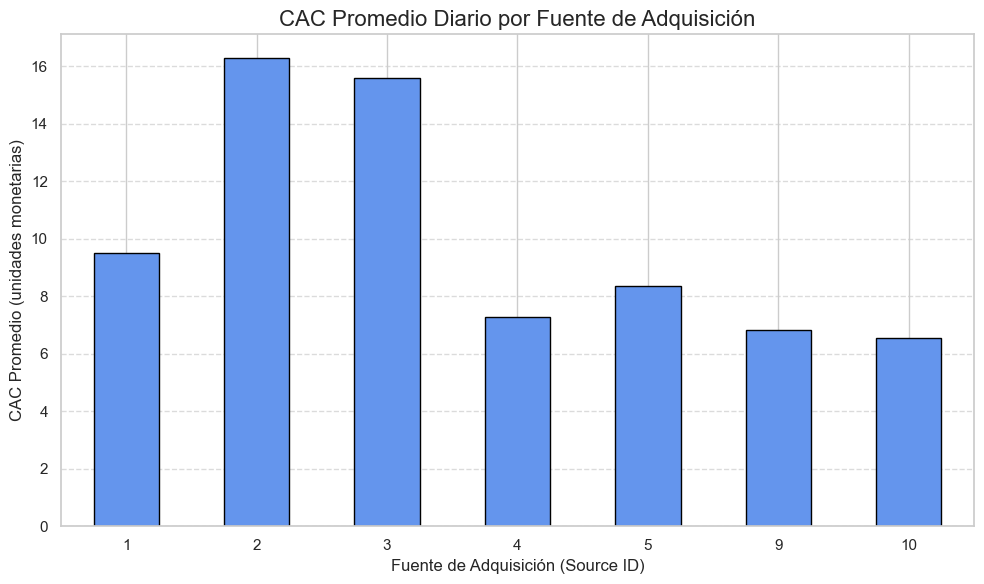

In [40]:
# Configurar estilo del gráfico
sns.set(style="whitegrid")

# Crear un gráfico de barras para el CAC promedio por fuente
plt.figure(figsize=(10, 6))
average_cac_per_source.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title("CAC Promedio Diario por Fuente de Adquisición", fontsize=16)
plt.xlabel("Fuente de Adquisición (Source ID)", fontsize=12)
plt.ylabel("CAC Promedio (unidades monetarias)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [44]:
# Crear la columna 'cohort_month' en el dataframe costs
costs['cohort_month'] = costs['dt'].dt.to_period('M')

# **1. Obtener la fuente de adquisición y la fecha de la primera compra**
# Obtener la primera visita por usuario
first_visits = visits.sort_values(by=['uid', 'start ts']).groupby('uid', as_index=False).first()
first_visits.rename(columns={'start ts': 'first_visit_date'}, inplace=True)

# Obtener la primera compra por usuario
first_purchases = orders.groupby('uid')['buy ts'].min().reset_index()
first_purchases.rename(columns={'buy ts': 'first_purchase_date'}, inplace=True)

# Unir la primera visita y compra con todos los datos de órdenes
user_data = pd.merge(first_visits, first_purchases, on='uid', how='inner')
user_data = pd.merge(user_data, orders[['uid', 'buy ts', 'revenue']], on='uid', how='left')

# Calcular el mes de primera compra (cohorte) y el mes de cada orden
user_data['cohort_month'] = user_data['first_purchase_date'].dt.to_period('M')
user_data['order_month'] = user_data['buy ts'].dt.to_period('M')

# Manejar valores nulos y calcular cohort_age
user_data = user_data.dropna(subset=['cohort_month', 'order_month'])
user_data['cohort_age'] = (user_data['order_month'] - user_data['cohort_month']).apply(lambda x: x.n)

# **2. Calcular ROMI por fuente**
romi_results = []

for source in user_data['source_id'].unique():
    # Filtrar por fuente específica
    source_data = user_data[user_data['source_id'] == source]
    
    # Calcular tamaño de cohorte (número de usuarios únicos en cada cohorte)
    cohort_sizes = source_data.groupby('cohort_month')['uid'].nunique().reset_index()
    cohort_sizes.rename(columns={'uid': 'cohort_size'}, inplace=True)
    
    # Calcular revenue por cohorte y edad de cohorte
    cohort_revenue = source_data.groupby(['cohort_month', 'cohort_age'])['revenue'].sum().reset_index()
    
    # Unir tamaño de cohorte con revenue
    ltv_data = pd.merge(cohort_revenue, cohort_sizes, on='cohort_month', how='left')
    
    # Calcular LTV (revenue por usuario)
    ltv_data['ltv'] = ltv_data['revenue'] / ltv_data['cohort_size']
    
    # Obtener costos de marketing por fuente y mes
    source_costs = costs[costs['source_id'] == source].groupby('cohort_month')['costs'].sum().reset_index()
    
    # Unir costos con el LTV
    ltv_data = pd.merge(ltv_data, source_costs, on='cohort_month', how='left')
    
    # Calcular CAC (costos por usuario)
    ltv_data['cac'] = ltv_data['costs'] / ltv_data['cohort_size']
    
    # Calcular ROMI (ltv/cac)
    ltv_data['romi'] = (ltv_data['ltv'] / ltv_data['cac']).round(2)
    
    # Guardar los resultados para esta fuente
    romi_results.append(ltv_data)

# Combinar resultados de todas las fuentes
final_romi_data = pd.concat(romi_results)

# **3. Transformar en tabla pivote para visualización**
romi_pivot_table = final_romi_data.pivot_table(
    index='cohort_month',
    columns='cohort_age',
    values='romi',
    aggfunc='mean'
)

# **4. Visualizar resultados**
print("Tabla ROMI por cohorte y edad de cohorte:")
print(romi_pivot_table)

Tabla ROMI por cohorte y edad de cohorte:
cohort_age          0         1         2         3         4         5   \
cohort_month                                                               
2017-06       0.697143  0.088571  0.108333  0.195000  0.198333  0.130000   
2017-07       0.731429  0.048571  0.166667  0.060000  0.041667  0.031667   
2017-08       0.674286  0.060000  0.072857  0.058333  0.061667  0.036667   
2017-09       0.681429  0.170000  0.074286  0.418571  0.057143  0.076667   
2017-10       0.772857  0.085714  0.034286  0.024286  0.025714  0.028571   
2017-11       0.712857  0.051429  0.032857  0.054286  0.021429  0.007143   
2017-12       0.612857  0.041429  0.140000  0.163333  0.043333  0.045714   
2018-01       0.467143  0.030000  0.035714  0.026667  0.006667       NaN   
2018-02       0.564286  0.038571  0.010000  0.014000       NaN       NaN   
2018-03       0.805714  0.064286  0.047143       NaN       NaN       NaN   
2018-04       0.554286  0.043333       NaN    

La celda no compila puesto que user_data no existe.

Buen trabajo, me parece que está todo bien con el cálculo del ROMI, pero para presentar un ROMI agrupado de todas las fuentes, mejor muestra un promedio, cambia sum por mean

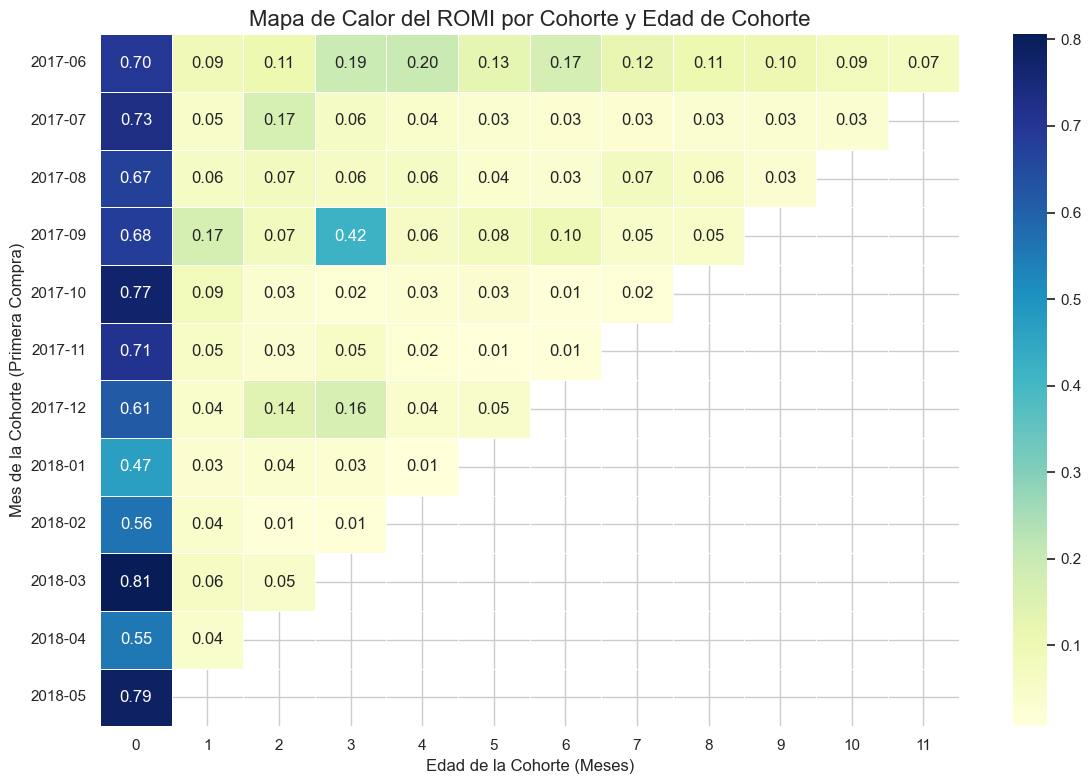

In [45]:
# Configurar estilo del gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(
    romi_pivot_table, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    linewidths=0.5, 
    linecolor="white"
)

# Títulos y etiquetas
plt.title("Mapa de Calor del ROMI por Cohorte y Edad de Cohorte", fontsize=16)
plt.xlabel("Edad de la Cohorte (Meses)", fontsize=12)
plt.ylabel("Mes de la Cohorte (Primera Compra)", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

Priorizar la inversión en las fuentes más rentables:

1. Source 1 y Source 2 deben ser las mayores prioridades, dado que consistentemente ofrecen un ROMI alto (109.31 y 60.63, respectivamente). Estas fuentes generan un excelente retorno por cada peso invertido, lo que las hace fundamentales para maximizar la rentabilidad.

Ambas fuentes tienen valores de CAC moderados (2.92 y 5.86) pero equilibrados por su capacidad para generar altos ingresos de manera sostenida.

2. Aumentar moderadamente la inversión en fuentes secundarias:

Source 5 y Source 4 también muestran un desempeño sólido, con ROMIs de 21.83 y 7.13 respectivamente, y LTV en crecimiento estable según el análisis acumulativo. Estas fuentes justifican una inversión adicional moderada para seguir impulsando sus resultados positivos.

La inversión aquí puede concentrarse durante meses de alta estacionalidad, como se observó en octubre-diciembre.

3. Redistribuir presupuesto desde fuentes menos eficientes:

Source 3 y Source 10 tienen un rendimiento más bajo, con ROMIs de 1.10 y 1.51 respectivamente, además de un Tamaño Promedio de Compra menor y un CAC elevado. Se recomienda reducir el gasto en estas fuentes y enfocar esos recursos en las fuentes más efectivas.

# Recomendaciones: métricas clave: 

ROMI: Evaluamos la relación entre ingresos y costos para priorizar las fuentes que ofrecen el mayor retorno de inversión.

CAC: Fuentes como Source 9 y Source 1 tienen un CAC bajo, lo que indica eficiencia en la adquisición de clientes con menor costo.

LTV: El análisis por cohortes indica que las fuentes de adquisición con mejor desempeño (e.g., Source 1 y Source 2) generan usuarios con un valor de vida en crecimiento sostenido, lo que sugiere una excelente retención y monetización.

Estas métricas se complementaron con datos como tendencias temporales, que muestran estacionalidades marcadas (picos de actividad en Q4) que pueden ser aprovechadas con estrategias específicas.
